# The outliers investigation

Unusual events often captivate our attention. In one study published in 2006, participants were shown a series of similar images (landscapes, interiors, faces, ...) and, randomly, the an oddball image. In the meanwhile researchers were looking at the areas activated in the brains of the subjects. The experiment show that the pleasure centers of the brain were activated when the oddball was shown! {cite}`oddball`

Replicating this behavior in a machine is particularly interesting because it means that the machine can bring to our attention cases where the data presents novelty that is worth human attention or cases where the data is simply wrong and can be discarded.

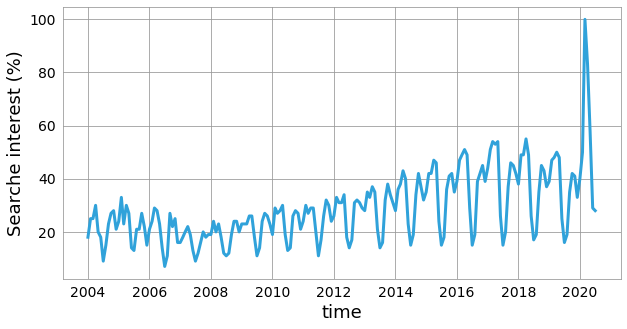

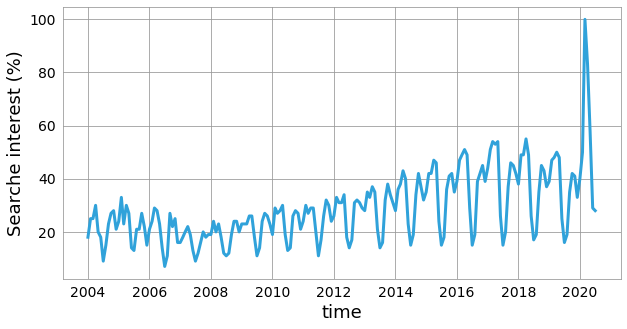

In [1]:
from mlpages_lib import *
%matplotlib inline

data = pd.read_csv('../data/exponential_growth_searches.csv', parse_dates=['Month'], skiprows=1)

fig = plt.figure(figsize=(10, 5))
plt.plot(data.Month, data['exponential growth: (Worldwide)'], '-')
plt.ylabel('Searche interest (%)')
plt.xlabel('time')
glue("expogrowth_fig_1", fig, display=False)

```{glue:figure} expogrowth_fig_1
:name: "expogrowth-fig-1"

Worldwide search interest for the term "exponential growth" from Google Trends.
```

In {ref}`this figure <expogrowth-fig-1>` we see the search interest regarding the term "exponential growth". As we can see there is a seasonal interest that results in spikes during the exam periods but also a spike at the beginning of 2020 that is twice in magnitude to any other spike observed before. This was due to the COVID-19 pandemic, in which the spread of the virus that was causing the disease had an exponential growth and people were interested in stopping the growth.

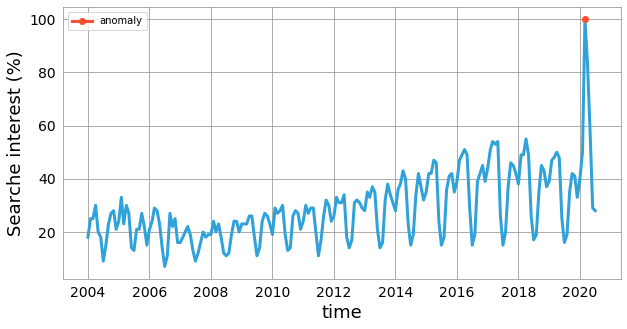

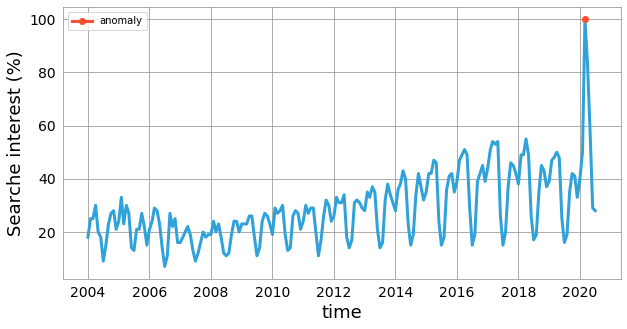

In [2]:
fig = plt.figure(figsize=(10, 5))

outliers = data['exponential growth: (Worldwide)'] > data['exponential growth: (Worldwide)'].mean()*3
plt.plot(data.Month, data['exponential growth: (Worldwide)'], '-')
plt.plot(data[outliers].Month, 
            data[outliers]['exponential growth: (Worldwide)'], '-o', color='C1', label='anomaly')
plt.ylabel('Searche interest (%)')
plt.xlabel('time')
plt.legend()
glue("expogrowth_fig_2", fig, display=False)

```{glue:figure} expogrowth_fig_2
:name: "expogrowth-fig-2"

Outliers in the worldwide search interest for the term "exponential growth".
```

A machine can spot these outliers with a simple trick. If we look at the data we realize that the average interest previous to 2020 was about 30%. A rule to spot outliers is to consider all the values that are 3 times the average. The idea behind this rule is that only 0.1% of the values in the data should be that far from the average (under the assumption that the data is normally distributed). A machine can easily apply this rule to our data and highlight the outlier as in the {ref}` figure above<expogrowth-fig-2>`.